<a href="https://colab.research.google.com/github/Mona1804/mona/blob/main/Retails_sales_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project** **Title** : **Sales** **Prediction** : **Predicting** **sales** **of** **a** **major** **store** **chain** **Rossmann**

### **Name : Monika Kamble**

**Github** **link** : https://github.com/Mona1804/mona/blob/3f4f10fdba13ec57caeee9a28dd51d05c7b4b8e4/Retails_sales_Prediction.ipynb

## **Problem** **Description** : 


### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

**DATA** **FIELDS**   

ID   - Unique entry ID

store - store ID

sales - sales made for the day 

customers - fotfull of the day 

open - open or closed

stateHoliday - stateHolliday or not

schoolHoliday - schoolHoliday or not 

assortment - type of assortment 

competition distance - distance from the nearest competition 

promo - store runing promotion or not 

promo 2 -store runing consective promotion or not

StoreType - differentiates between 4 different store models: a, b, c, d

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


In [ ]:
#Importing important libraries and modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

In [ ]:
#csv file location
sales_df = pd.read_csv('/content/Rossmann Stores Data.csv')
store_df=pd.read_csv('/content/store.csv')


In [ ]:
#we have historical sales data and stores datasets
#first look of the sales data
sales_df.head()
     

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555.0,1.0,1.0,0,1.0
1,2,5,2015-07-31,6064,625.0,1.0,1.0,0,1.0
2,3,5,2015-07-31,8314,821.0,1.0,1.0,0,1.0
3,4,5,2015-07-31,13995,1498.0,1.0,1.0,0,1.0
4,5,5,2015-07-31,4822,559.0,1.0,1.0,0,1.0


In [ ]:
#first look of stores dataframe
store_df.head()
     

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
#info about the sales dataset
sales_df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560478 entries, 0 to 560477
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          560478 non-null  int64  
 1   DayOfWeek      560478 non-null  int64  
 2   Date           560478 non-null  object 
 3   Sales          560478 non-null  int64  
 4   Customers      560477 non-null  float64
 5   Open           560477 non-null  float64
 6   Promo          560477 non-null  float64
 7   StateHoliday   560477 non-null  object 
 8   SchoolHoliday  560477 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 38.5+ MB


In [ ]:

#info about the stores
store_df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


**Missing** **Data** **Handling**

In [ ]:
#null values in stores df
store_df.isnull().sum()
     

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Out of 1115 entries there are missing values for the columns:

CompetitionDistance- distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

CompetitionOpenSinceYear- gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.



Text(0.5, 0, 'Competition Distance Distribution Plot')

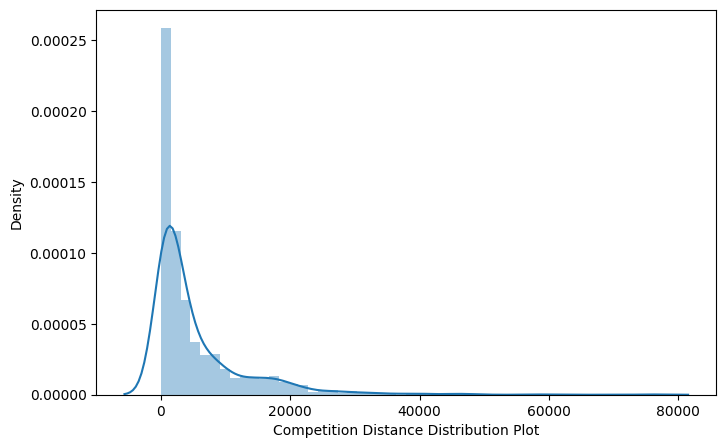

In [ ]:
#distribution plot of competition distance
sns.distplot(x=store_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

In [ ]:
#creating a categorical column list 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType
                  ']

In [ ]:
# filling competition distance with the median value
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

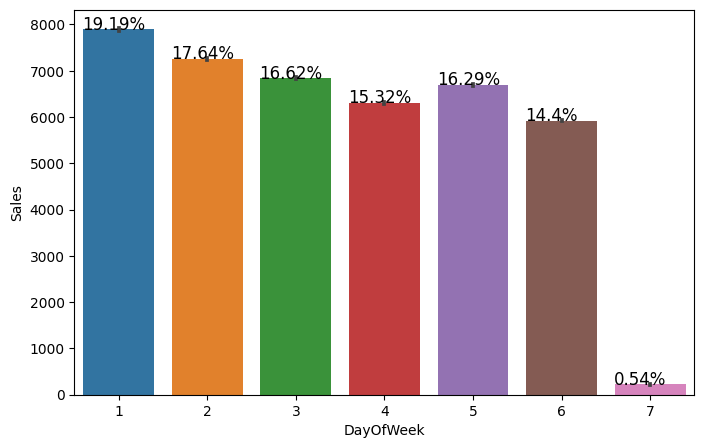

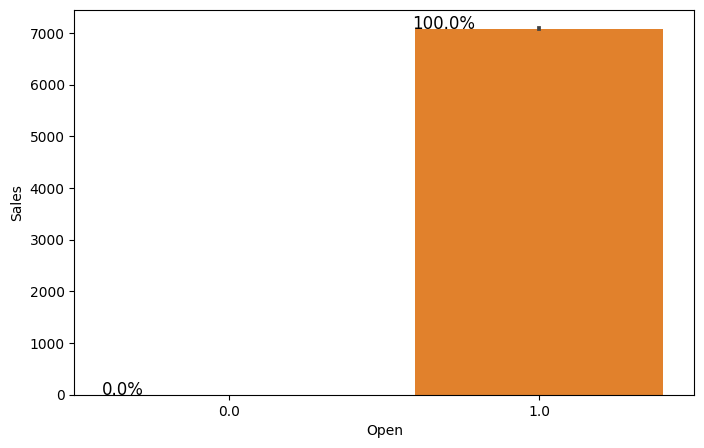

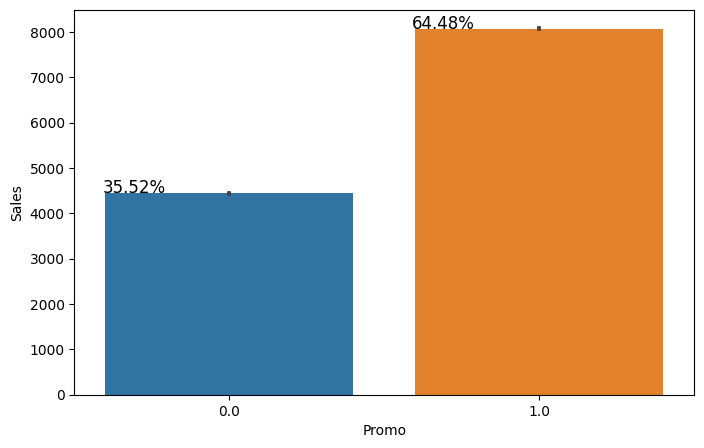

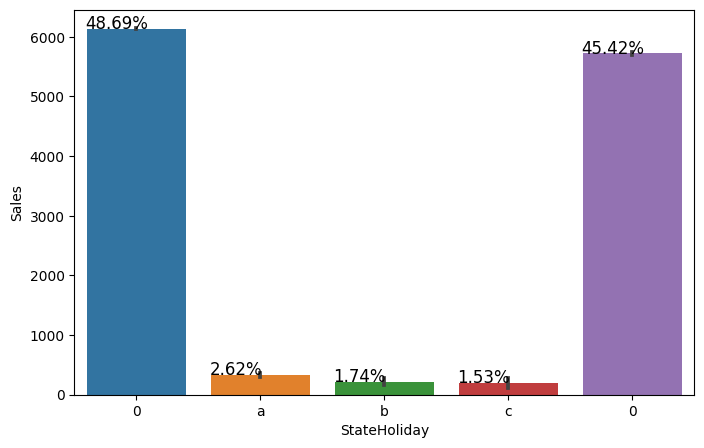

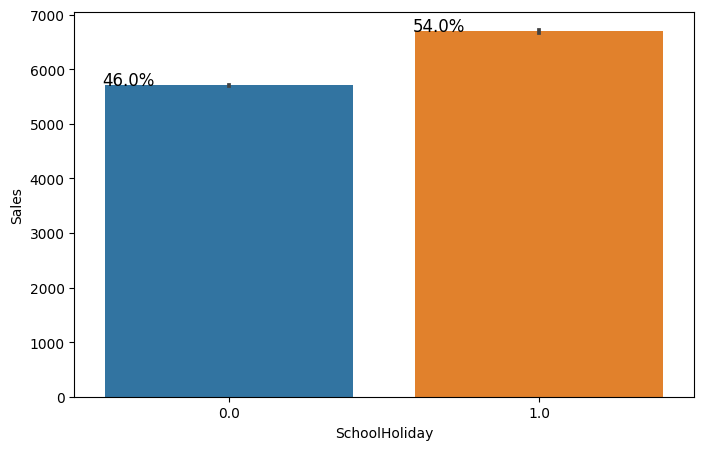

In [ ]:
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']
                         
for value in categorical_variables:
  ax = sns.barplot(x=sales_df[value], y=sales_df['Sales']) 
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

**Observation**:

There were more sales on Monday, probably because shops generally remain closed
on Sundays.

It could be seen that the Promo leads to more sales.

Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.

More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.


In [ ]:
# shape of our data
store_data.shape

(1017209, 9)

In [ ]:
 # lets see columns name of data
print( store_data.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


In [ ]:
# Attribute informations
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# checking of dublicate values
store_data.duplicated().sum()

0

there is no duplicate rows and values

In [ ]:
# checking for missing values
store_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
# checking foe unique values
print(store_data.nunique().sort_values())

Open                 2
Promo                2
SchoolHoliday        2
StateHoliday         5
DayOfWeek            7
Date               942
Store             1115
Customers         4086
Sales            21734
dtype: int64


Text(0.5, 1.0, 'store status')

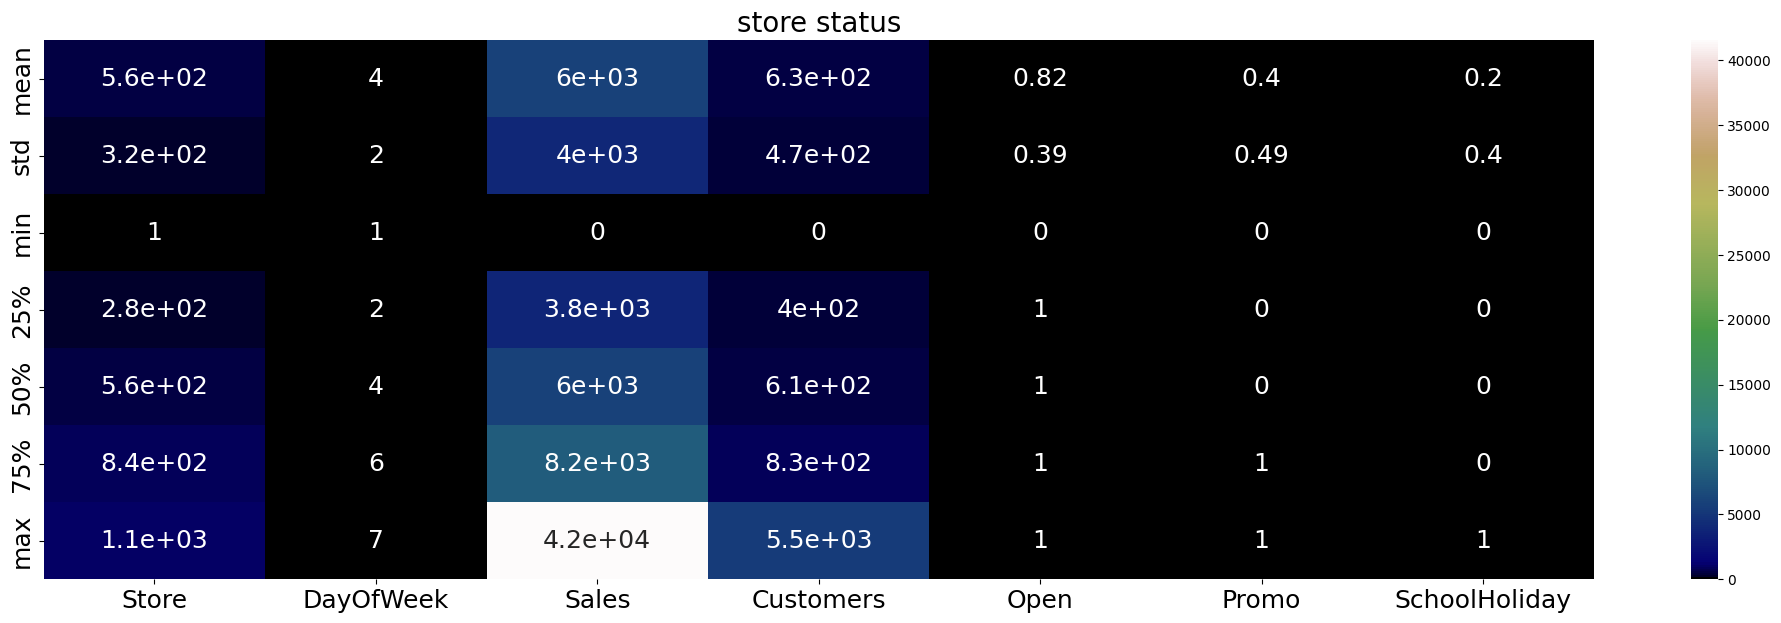

In [ ]:
# #Descriptive Stats in visual form
plt.figure(figsize=(25,7))
svm = sns.heatmap(store_data.describe()[1:], annot=True , cmap='gist_earth',annot_kws={"size": 18})
svm.set_xticklabels(svm.get_xmajorticklabels(), fontsize = 18)
svm.set_yticklabels(svm.get_ymajorticklabels(), fontsize = 18)
plt.title('store status', fontsize = 20)

In [ ]:
# filling competition distance with the median value
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

In [ ]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)
     

In [ ]:
# imputing the nan values of promo2 related columns with 0
store_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
store_df['Promo2SinceYear'].fillna(value=0,inplace=True)
store_df['PromoInterval'].fillna(value=0,inplace=True)
     

In [ ]:
#merge the datasets on stores data
df = sales_df.merge(right=store_df, on="Store", how="left")

In [ ]:
#first five rows of the merged dataset
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625.0,1.0,1.0,0,1.0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821.0,1.0,1.0,0,1.0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498.0,1.0,1.0,0,1.0,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559.0,1.0,1.0,0,1.0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


<Axes: >

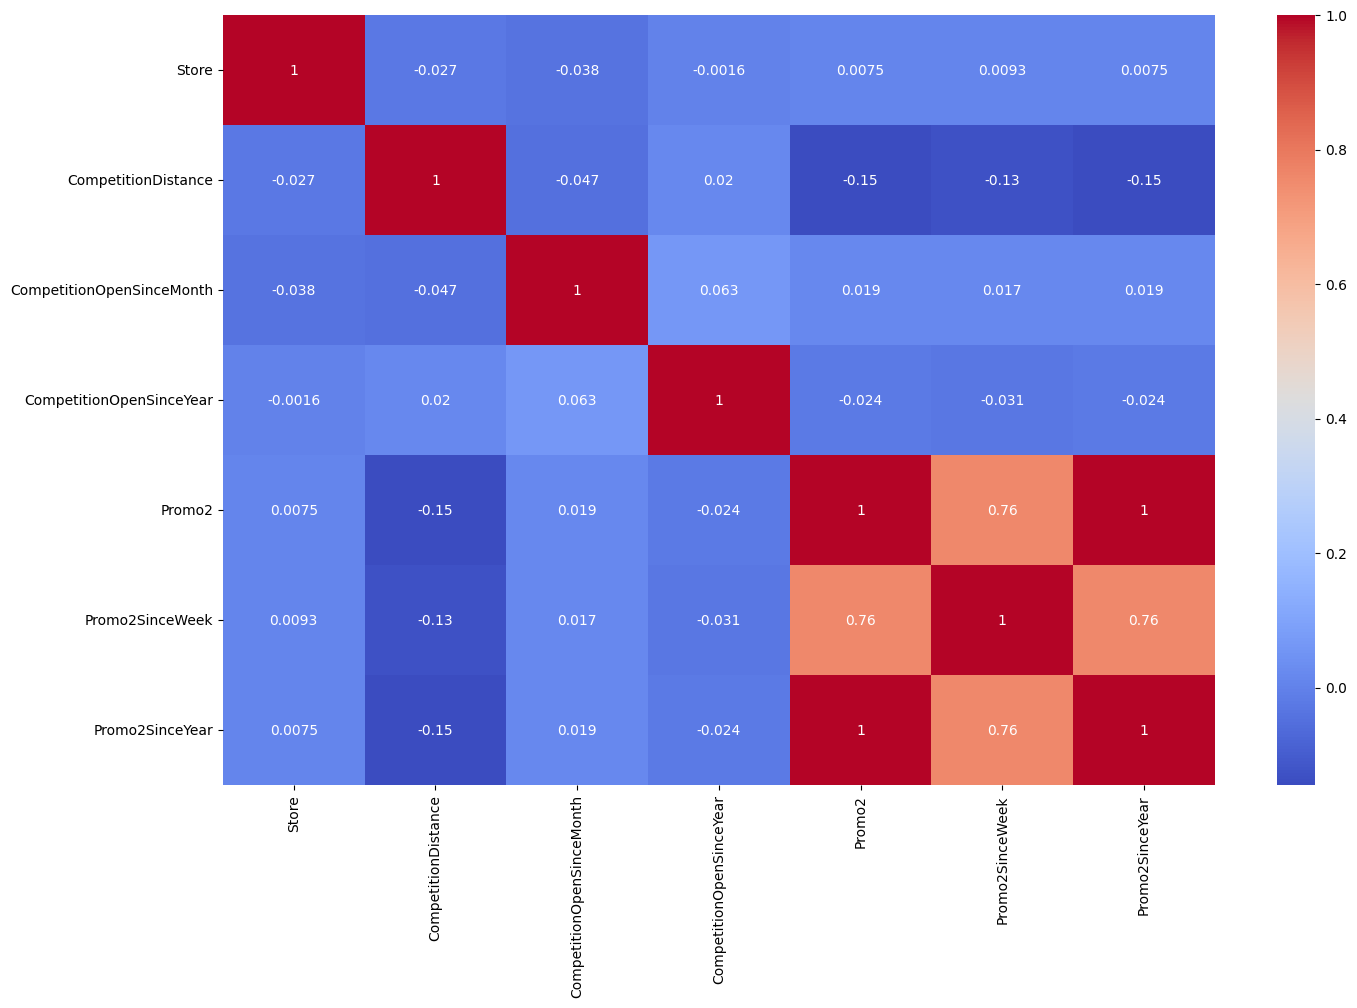

In [ ]:

#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(store_df.corr(), cmap="coolwarm", annot=True)

**Observation**:

Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.

State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.

CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.

There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.

The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

In [ ]:
store_df = store_data.drop(['Store','DayOfWeek','Sales','Customers','Open','Promo','SchoolHoliday'], axis=1)
store_df.head()

,Date,StateHoliday
0,2015-07-31,0
1,2015-07-31,0
2,2015-07-31,0
3,2015-07-31,0
4,2015-07-31,0


In [ ]:
store_df.shape

(224069, 2)

In [ ]:
store_data['Promo'].value_counts()

0.0    134915
1.0     89153
Name: Promo, dtype: int64

In [ ]:
import plotly.express as px

Text(0.5, 1.0, 'Promo')

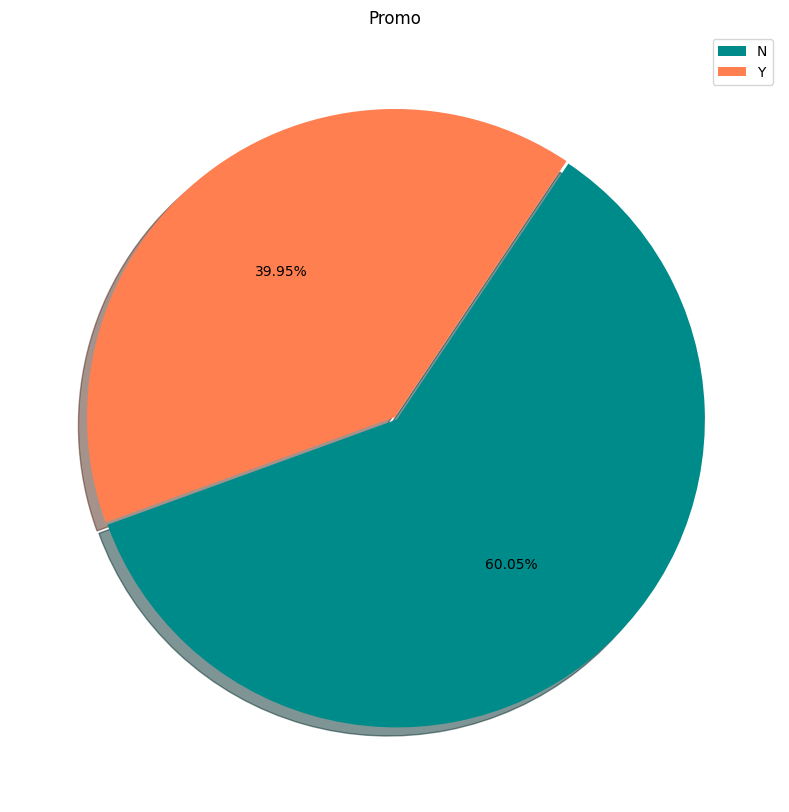

In [ ]:
#Promo

plt.figure(figsize=(15,10))
mycolors = ['DarkCyan','coral']
plt.pie(store_data['Promo'].value_counts(), shadow=True,colors=mycolors, explode=[0.01,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['N','Y'])
plt.title('Promo')

The Ratio Of Promo is 40 % to 60%

<Axes: xlabel='Open', ylabel='Sales'>

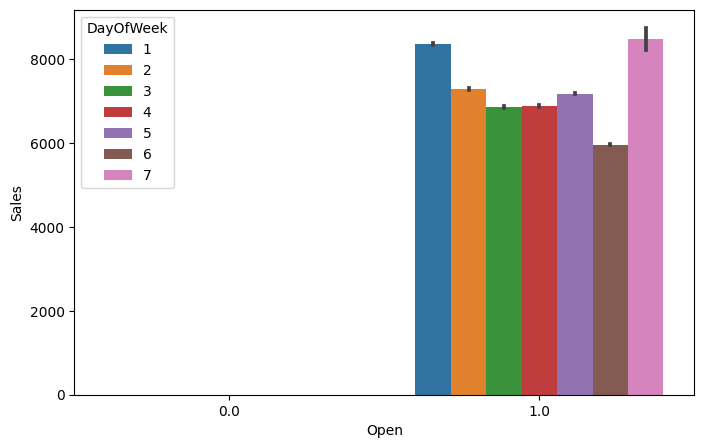

In [ ]:
# open and storetype relationship 
#this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
sns.barplot(x=sales_df["Open"],y=sales_df['Sales'],hue=sales_df["DayOfWeek"])

**Observation**:

This is a count plot of open shops according to the day of the week. It's clear that the number of shops open on Sundays were very less and hence low sales. Some shops were closed on weekdays as well accounting to the stores closed due to refurbishment or holidays.

<Axes: xlabel='StoreType', ylabel='Sales'>

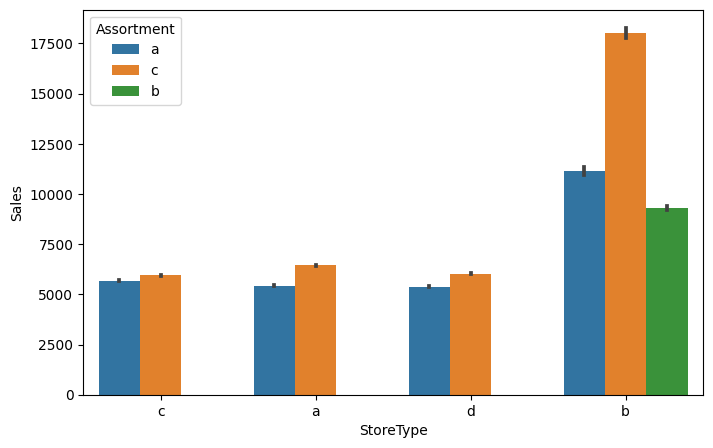

In [ ]:
#Let's check the relationship between store type, assortment levels and sales
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])
     

**Observation**:

The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

In [ ]:

#Store Type and Sales Exploration
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type
     

,StoreType,Sales,Customers
0,a,1770655334,201027406.0
3,d,986652794,86627806.0
2,c,442240809,51308362.0
1,b,93931406,18361940.0


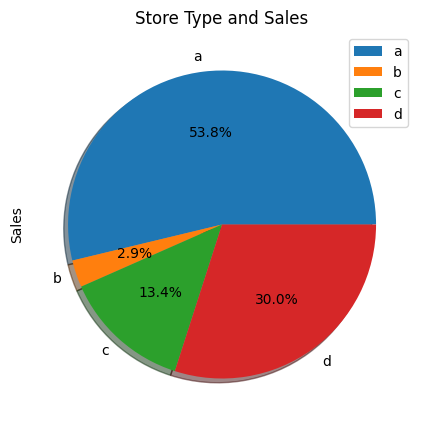

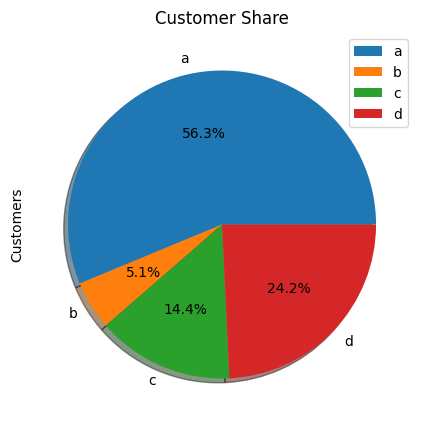

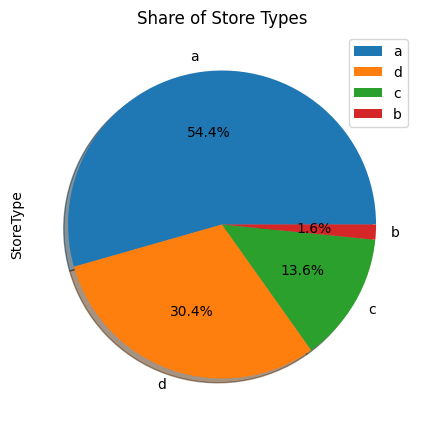

In [ ]:
#let's explore store type a bit and it's influence on sales
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
     


**Observation**:

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.

But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.

Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

<Axes: xlabel='Customers', ylabel='Sales'>

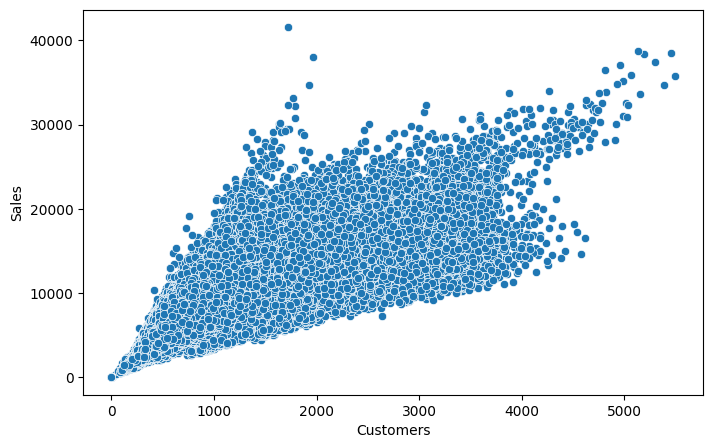

In [ ]:
#scatterplot of Customers and Sales
sns.scatterplot(x=df['Customers'], y=df['Sales'])


**Observation**:

Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.

<Axes: ylabel='Density'>

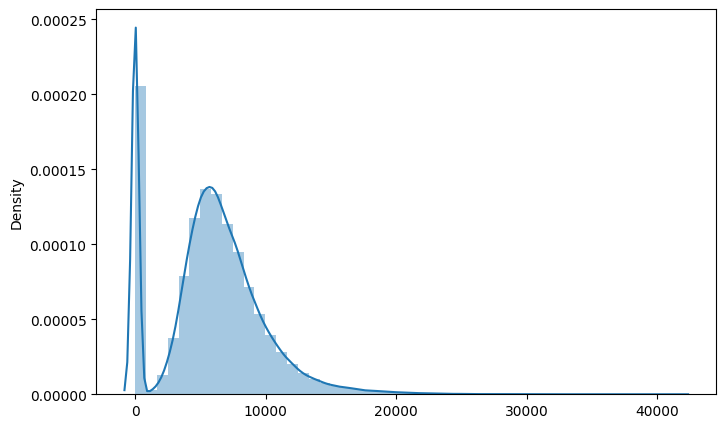

In [ ]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=df['Sales'])

**Observation**:

The drop in sales indicates the 0 sales accounting to the stores temporarily closed due to refurbishment. This drop was also seen in the Sales over the years plot earlier.

In [ ]:
#no of observations for closed stores with 0 sales
(df[df.Open == 0]).shape
     

(95712, 18)

**EDA** **Conclusions** **and** **Hypotheses** **Validation**:

There's a positive correlation between customers and sales which is explanatory.

Here it can be deduced that there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.

The positive effect of promotion on Customers and Sales is observable.

It is clear that most of the stores remain closed during State and School Holidays.

But it is important to note that more stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.

Based on the above findings it seems that there are quite a lot of opportunities in store type 'b' & 'd' as they had more number of customers per store and more sales per customer, respectively. Store type a & c are quite similar in terms of "per customer and per store" sales numbers and just because the majority of the stores were of these kinds, they had the best overall revenue numbers. On the other hand, store type b were very few in number and even then they had better average sales than others.

Earlier, it was observed that only store type b had all three kinds of assortment levels and rest of t the store types had two of them. It seems that in some b type stores the products were different as compared to others because the revenue per store is significantly more than the others.

When comparing the sales of the three years, it is observable that sales increase by the end of the year indicating that people shop more before the holidays. All the stores showed Christmas seasonality. This validates the previous hypothesis.

The second thing to notice was that sales dropped for a few months in 2014 accounting for the stores closed due to refurbishment.

Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away.